## Principal Component Analysis(PCA)
In this notebook we will implement PCA algorithm from scratch

In [30]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn import datasets
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [10]:
class PCA():
    def __init__(self, n_components= 3):
        self.n_components = n_components
        
    
    def fit(self,X):
        X_mean = np.mean(X,axis=0)
        X = X - X_mean
        cov_mat = np.cov(X.T) # needs samples as columns
        
        eigen_values,eigen_vectors = np.linalg.eig(cov_mat) # eigen vector-> eigen_vector[:,i] 
        eigen_vectors = eigen_vectors.T  # transpose to make eigen_vector-> eigen_vector[i]
        
        indices = np.argsort(eigen_values)[::-1]
        eigen_vectors = eigen_vectors[indices]
        eigen_values = eigen_values[indices]
        
        self.components = eigen_vectors[0:self.n_components]

    
    def transform(self,X):
        X =  X - X.mean(axis=0)
        projection = np.dot(X,self.components.T)
        return projection

In [12]:
iris = datasets.load_iris()
data = iris.data

In [11]:
pca = PCA(n_components=2)
pca.fit(data)
project = pca.transform(data)

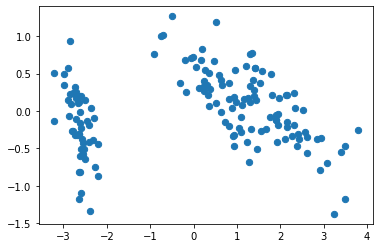

In [19]:
plt.scatter(project[:,0],project[:,1],s=40,cmap=plt.cm.Spectral)

In [31]:
np.random.seed(22)

num_clusters = 8
num_samples = 1000
cluster_std = 1.0
X, c = make_blobs(n_samples=num_samples, n_features=4, centers=num_clusters, cluster_std=cluster_std)

In [33]:
pca = PCA(n_components=2)
pca.fit(X)
project = pca.transform(X)

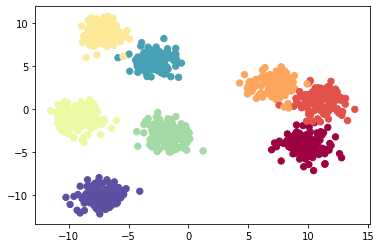

In [35]:
plt.scatter(project[:,0],project[:,1], c=c, s=40, cmap=plt.cm.Spectral)